In [7]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from neural_flow import Flow, train
import jax
import optax

In [12]:
X, C = make_moons(10_000, noise=0.1)

C = C.reshape(-1, 1)
X_train, X_test, C_train, C_test = train_test_split(X, C)
X_train = jax.device_put(X_train)
X_test = jax.device_put(X_test)
C_train = jax.device_put(C_train)
C_test = jax.device_put(C_test)

flow = Flow()

params, best_epoch, train_losses, test_losses = train(
    flow, X_train, C_train, X_test, C_test, optimizer=optax.nadamw(learning_rate=1e-3)
)
test_losses[best_epoch]

Output()

0.35744890570640564

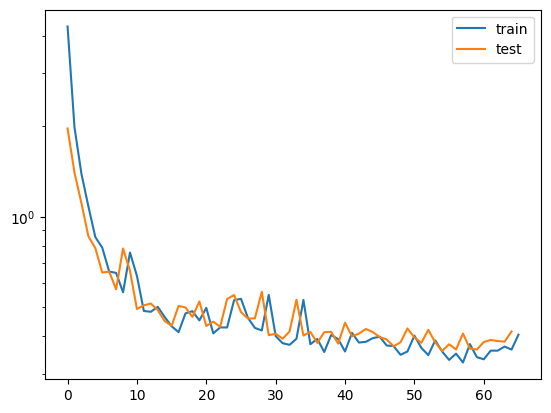

In [15]:
plt.plot(train_losses, label="train")
plt.plot(test_losses, label="test")
plt.semilogy()
plt.legend();

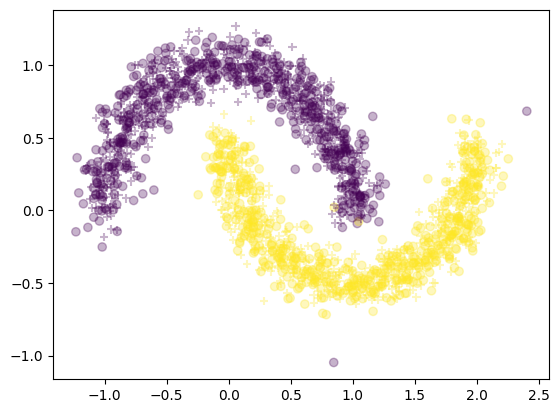

In [18]:
Xm = flow.sample(params, C_test)
plt.scatter(*Xm[:1000].T, c=C_test[:1000], marker="o", alpha=0.3)
plt.scatter(*X_test[:1000].T, c=C_test[:1000], marker="+", alpha=0.3);